In [1]:
import random
import math
import numpy as np
from matplotlib import pyplot as plt

## (b) maximum number of possible combinations of inventory bags

In [2]:
item_size = 15
weight_list = [3.3, 3.4, 6.0, 26.1, 37.6, 62.5, 100.2, 141.1, 119.2, 122.4, 247.6, 352.0, 24.2, 32.1, 42.5]
points_list = [7, 8, 13, 29, 48, 99, 177, 213, 202, 210, 380, 485, 9, 12, 15]

def fitness_val(bag):
    weight = 0
    for i in range(item_size):
      if bag[i]:
        weight += weight_list[i]
    if weight > 529:
      return 0
    # a
    a_cond = (bag[0] or bag[1] or bag[2]) and (bag[3] or bag[4] or bag[5]) and (bag[12] or bag[13] or bag[14])
    if not a_cond:
      return 0
    points = 0
    for i in range(item_size):
      if bag[i]:
        points += points_list[i]
    # b
    if bag[0] and bag[5]:
      points += 5
    # c
    if bag[3] and (bag[9] or bag[8]):
      points += 15
    # d
    if (bag[7] or bag[10]) and bag[5] and bag[14]:
      points += 25
    # e
    if bag[12] and bag[13] and bag[14]:
      points += 70
    
    return points

count = 0
for i in range(2**15):
  temp = i
  bag = []
  for _ in range(15):
    bag.append(temp%2)
    temp = temp >> 1
  if fitness_val(bag) != 0:
    count += 1
print(count)

6455


## (cd) Genetic Algorithm

In [ ]:
def GA(iter=20):  
  cross_prob = 0.1
  mutate_prob = 0.07
  population_size = 10
  item_size = 15
  mps = 6 # mating pool size
  weight_list = [3.3, 3.4, 6.0, 26.1, 37.6, 62.5, 100.2, 141.1, 119.2, 122.4, 247.6, 352.0, 24.2, 32.1, 42.5]
  points_list = [7, 8, 13, 29, 48, 99, 177, 213, 202, 210, 380, 485, 9, 12, 15]

  def fitness_val(bag):
    weight = 0
    for i in range(item_size):
      if bag[i]:
        weight += weight_list[i]
    if weight > 529:
      return 0
    # a
    a_cond = (bag[0] or bag[1] or bag[2]) and (bag[3] or bag[4] or bag[5]) and (bag[12] or bag[13] or bag[14])
    if not a_cond:
      return 0
    points = 0
    for i in range(item_size):
      if bag[i]:
        points += points_list[i]
    # b
    if bag[0] and bag[5]:
      points += 5
    # c
    if bag[3] and (bag[9] or bag[8]):
      points += 15
    # d
    if (bag[7] or bag[10]) and bag[5] and bag[14]:
      points += 25
    # e
    if bag[12] and bag[13] and bag[14]:
      points += 70
    
    return points
    
  def roulette_select(population):
    fitness_list = []
    for bag in population:
      fitness_list.append(fitness_val(bag))
    
    population = random.choices(population, k=mps, weights=fitness_list)
    return population

  def crossover(bag1, bag2):
    bag1_child = bag1.copy()
    bag2_child = bag2.copy()
    for i in range(item_size):
      if random.uniform(0.0, 1.0) <= cross_prob:
        bag1_child[i], bag2_child[i] = bag2_child[i], bag1_child[i]
    return bag1_child, bag2_child

  def mutation(bag):
    if random.uniform(0.0, 1.0) <= mutate_prob:
      bag[0], bag[1], bag[2] = 1^bag[0], 1^bag[1], 1^bag[2]
    if random.uniform(0.0, 1.0) <= mutate_prob:
      bag[3], bag[4], bag[5] = 1^bag[3], 1^bag[4], 1^bag[5]
    if random.uniform(0.0, 1.0) <= mutate_prob:
      bag[6], bag[7], bag[8], bag[9], bag[10], bag[11] = 1^bag[6], 1^bag[7], 1^bag[8], 1^bag[9], 1^bag[10], 1^bag[11]
    if random.uniform(0.0, 1.0) <= mutate_prob:
      bag[12], bag[13], bag[14] = 1^bag[12], 1^bag[13], 1^bag[14]
    return bag

  # random generate 10 population
  population = []
  for i in range(population_size):
    population.append([])
    for _ in range(item_size):
      population[i].append(random.randint(0, 1))
  population_fit = [fitness_val(bag) for bag in population]
  best_points = max(population_fit)
  best_bag = population[population_fit.index(max(population_fit))]

  for _ in range(iter):
    # select
    population = roulette_select(population)
    # crossover
    mating_pool = list(range(0, mps))
    random.shuffle(mating_pool)
    for i in range(int(mps/2)):
      child1, child2 = crossover(population[mating_pool[i*2]], population[mating_pool[i*2+1]])
      population.append(child1)
      population.append(child2)
    # mutation
    for i in range(len(population)):
      population[i] = mutation(population[i])
    
    # evaluation
    population_fit = [fitness_val(bag) for bag in population]
    best_points = max(population_fit)
    best_bag = population[population_fit.index(max(population_fit))]

  return best_bag, best_points

best_bag, best_points = GA(iter=20)
print(best_bag)
print(best_points)

[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1]
781


## (e) hill climbing

In [ ]:
def hillClimbing(iter=200): 
  item_size = 15
  weight_list = [3.3, 3.4, 6.0, 26.1, 37.6, 62.5, 100.2, 141.1, 119.2, 122.4, 247.6, 352.0, 24.2, 32.1, 42.5]
  points_list = [7, 8, 13, 29, 48, 99, 177, 213, 202, 210, 380, 485, 9, 12, 15]

  def fitness_val(bag):
    weight = 0
    for i in range(item_size):
      if bag[i]:
        weight += weight_list[i]
    if weight > 529:
      return 0
    # a
    a_cond = (bag[0] or bag[1] or bag[2]) and (bag[3] or bag[4] or bag[5]) and (bag[12] or bag[13] or bag[14])
    if not a_cond:
      return 0
    points = 0
    for i in range(item_size):
      if bag[i]:
        points += points_list[i]
    # b
    if bag[0] and bag[5]:
      points += 5
    # c
    if bag[3] and (bag[9] or bag[8]):
      points += 15
    # d
    if (bag[7] or bag[10]) and bag[5] and bag[14]:
      points += 25
    # e
    if bag[12] and bag[13] and bag[14]:
      points += 70
    
    return points

  def single_swap(bag):
    tempbag = bag.copy()
    ran = random.sample(range(1, item_size), k=2)
    tempbag[ran[0]], tempbag[ran[1]] = tempbag[ran[1]], tempbag[ran[0]]
    return tempbag

  # random bag
  bag = []
  for _ in range(item_size):
    bag.append(random.randint(0, 1))
  best_points = fitness_val(bag)
  best_bag = bag

  for i in range(iter):
    new_bag = single_swap(bag)
    if best_points < fitness_val(new_bag):
      best_bag = new_bag
      best_points = fitness_val(new_bag)
      bag = new_bag

  return best_bag, best_points

best_bag, best_points = hillClimbing(iter=200)
print(best_bag)
print(best_points)

[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]
756


## (e) random walk

In [ ]:
def randomWalk(iter=200): 
  item_size = 15
  weight_list = [3.3, 3.4, 6.0, 26.1, 37.6, 62.5, 100.2, 141.1, 119.2, 122.4, 247.6, 352.0, 24.2, 32.1, 42.5]
  points_list = [7, 8, 13, 29, 48, 99, 177, 213, 202, 210, 380, 485, 9, 12, 15]

  def fitness_val(bag):
    weight = 0
    for i in range(item_size):
      if bag[i]:
        weight += weight_list[i]
    if weight > 529:
      return 0
    # a
    a_cond = (bag[0] or bag[1] or bag[2]) and (bag[3] or bag[4] or bag[5]) and (bag[12] or bag[13] or bag[14])
    if not a_cond:
      return 0
    points = 0
    for i in range(item_size):
      if bag[i]:
        points += points_list[i]
    # b
    if bag[0] and bag[5]:
      points += 5
    # c
    if bag[3] and (bag[9] or bag[8]):
      points += 15
    # d
    if (bag[7] or bag[10]) and bag[5] and bag[14]:
      points += 25
    # e
    if bag[12] and bag[13] and bag[14]:
      points += 70
    
    return points

  def single_swap(bag):
    tempbag = bag.copy()
    ran = random.sample(range(1, item_size), k=2)
    tempbag[ran[0]], tempbag[ran[1]] = tempbag[ran[1]], tempbag[ran[0]]
    return tempbag

  # random bag
  bag = []
  for _ in range(item_size):
    bag.append(random.randint(0, 1))
  best_points = fitness_val(bag)
  best_bag = bag

  for i in range(iter):
    new_bag = single_swap(bag)
    if best_points < fitness_val(new_bag):
      best_bag = new_bag
      best_points = fitness_val(new_bag)
    bag = new_bag

  return best_bag, best_points

best_bag, best_points = randomWalk(iter=200)
print(best_bag)
print(best_points)

[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]
814


## (f) progress diagrams

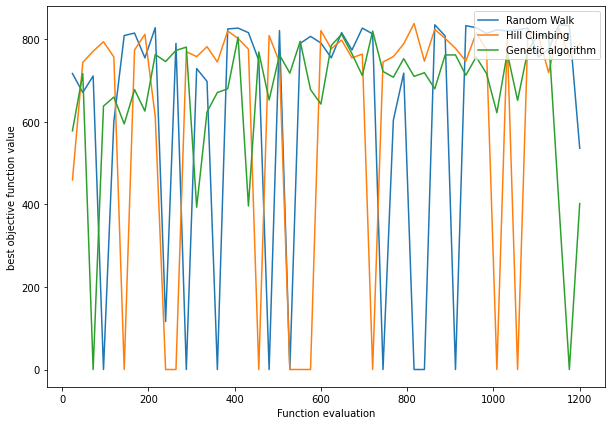

In [ ]:
iteration = list(range(24, 1201, 24))
randomWalk_plot = []
hillClimbing_plot = []
GA_plot = []
for iter in iteration:
  _, best_dist = randomWalk(iter=iter)
  randomWalk_plot.append(best_dist)
  _, best_dist = hillClimbing(iter=iter)
  hillClimbing_plot.append(best_dist)
  _, best_dist = GA(iter=int(iter/24))
  GA_plot.append(best_dist)
 
# plot
plt.figure(figsize=(10, 7))
plt.plot(iteration, randomWalk_plot, label='Random Walk')
plt.plot(iteration, hillClimbing_plot, label='Hill Climbing')
plt.plot(iteration, GA_plot, label='Genetic algorithm')
plt.legend(loc='upper right')
plt.ylabel("best objective function value") # y label
plt.xlabel("# Function evaluation") # x label

plt.show()